In [1]:
import numpy as np
import matplotlib.pyplot as plt

E = 210E9 
A = 10 # cm^2
L = 150
T = -20 # N/cm^2
Particion = 8

# E = 30E6 
# A = 2 # cm^2
# L = 60
# T = -10 # N/cm^2
# Particion = 4



In [2]:
Matriz_global = np.zeros([Particion+1,Particion+1])
F = np.zeros (Particion+1)

Ft = (1/2)*T*(L/Particion)**2   
f1 =  Ft/3  
f2 = (2*Ft)/3      


empotramiento = np.array([[0]])

In [3]:
# Matriz de rigidez
for i in range(Particion):

    #matriz global
    
     matriz = np.array([[1,-1],[-1,1]])
     K = (E*A*Particion)/L
     Matriz_local = K*matriz         
     A_G = np.array([i,i+1],dtype = int)
     Matriz_global[np.ix_(A_G,A_G)] +=  Matriz_local
     
     #Fuerzas    
    
     Fu = (T * ((L/Particion))**2)*i
     F[i] += ((1/2)*Fu + f1)
     F[i+1] += ((1/2)*Fu + f2)


F = np.array(F).reshape(-1,1)
Desplazamientos = np.linalg.solve (Matriz_global[0:Particion,0:Particion],F[0:Particion])
Desplazamientos = np.concatenate((Desplazamientos,empotramiento))
Fuerzas = np.dot(Matriz_global,Desplazamientos)
Reaccion = Fuerzas[Particion] - F[Particion]

In [4]:
print(Matriz_global)
print()
print(F)
print()


[[ 1.12e+11 -1.12e+11  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [-1.12e+11  2.24e+11 -1.12e+11  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00 -1.12e+11  2.24e+11 -1.12e+11  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00 -1.12e+11  2.24e+11 -1.12e+11  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 -1.12e+11  2.24e+11 -1.12e+11  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.12e+11  2.24e+11 -1.12e+11
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.12e+11  2.24e+11
  -1.12e+11  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.12e+11
   2.24e+11 -1.12e+11]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  -1.12e+11  1.12e+11]]

[[ -1171.875]
 [ -7031.25 ]
 [-14062.5  ]
 [-21093.75 ]
 [-28125.   ]
 [-35156.25 ]
 [-42187.5  ]
 [-49218.75 ]
 [-26953.125]]



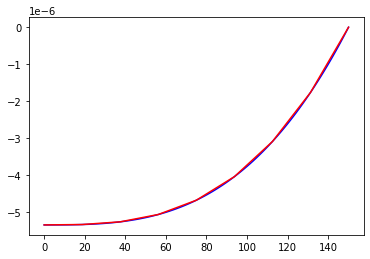

In [5]:
espacio = np.linspace(0,150,Particion+1)

espacio2 = np.linspace(0,150,100)
exacta = lambda x: (-T*(x**3-L**3))/(6*A*E)

plt.plot(espacio2,exacta(espacio2),'b')
plt.plot(espacio,Desplazamientos,'r')
plt.show()